# Sentiment Analysis

Techniques used 
1. Text Blob
2. VADER (Valence Aware Dictionary and sEntiment Reasoner)
3. Transformer-based Models 
    - Aift 
    - roBERTa
    - BERTweet

In [1]:
import pandas as pd  
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jenni\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
testing_data = pd.read_csv('testing_data.csv')
testing_data = testing_data.sample(frac = 1).reset_index().drop(columns=['index'])
testing_data.head()

,Review,Label
0,app does not refresh balance after you do a fa...,-1
1,well i downloaded it after rave reviews signup...,0
2,when i login online the digitoken message prom...,-1
3,usually dont use for bank transfer much as a s...,0
4,im happy to use the new version for this app u...,1


## Text Blob 

In [4]:
from textblob import TextBlob
from textblob.sentiments import PatternAnalyzer

In [5]:
def getTextBlobLabel(text):
    score = TextBlob(text,analyzer=PatternAnalyzer()).sentiment.polarity
    if score < 0:
        return -1
    elif score == 0:
        return 0
    else:
        return 1

In [6]:
for index, row in testing_data.iterrows():
    label = getTextBlobLabel(row['Review'])
    testing_data.at[index,'Textblob'] = label

In [7]:
testing_data.head()

,Review,Label,Textblob
0,app does not refresh balance after you do a fa...,-1,1.0
1,well i downloaded it after rave reviews signup...,0,1.0
2,when i login online the digitoken message prom...,-1,0.0
3,usually dont use for bank transfer much as a s...,0,1.0
4,im happy to use the new version for this app u...,1,1.0


## VADER

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [9]:
def getVaderLabel(text):
    sentiment = SentimentIntensityAnalyzer()
    sentiment_dict = sentiment.polarity_scores(text)
    if sentiment_dict['compound'] >= 0.05:
        return 1
    elif sentiment_dict['compound'] <= - 0.05:
        return -1
    else :
        return 0
 

In [10]:
for index, row in testing_data.iterrows():
    label = getVaderLabel(row['Review'])
    testing_data.at[index,'Vader'] = label

In [11]:
testing_data.head()

,Review,Label,Textblob,Vader
0,app does not refresh balance after you do a fa...,-1,1.0,-1.0
1,well i downloaded it after rave reviews signup...,0,1.0,1.0
2,when i login online the digitoken message prom...,-1,0.0,-1.0
3,usually dont use for bank transfer much as a s...,0,1.0,-1.0
4,im happy to use the new version for this app u...,1,1.0,1.0


## Transformers 

In [12]:
from transformers import pipeline

C:\Users\jenni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Aift 


In [13]:
def getAiftTransLabel(text):
    pipe = pipeline("text-classification", model="Cielciel/aift-model-review-multiple-label-classification", top_k = None, truncation=True)
    sentiment_dict = pipe(text)

    highest_score = 0
    sentiment_category = None
    
    for item in sentiment_dict[0]:
        # Check if the label corresponds to positive, neutral, or negative sentiment
        label = item['label']
        if label in ['positive', 'neutral', 'negative']:
            # If the score is higher than the current highest score, update the highest score and sentiment category
            if item['score'] > highest_score:
                highest_score = item['score']
                sentiment_category = label

    if sentiment_category == 'positive':
        return 1
    elif sentiment_category == 'negative':
        return -1
    else :
        return 0

In [14]:
for index, row in testing_data.iterrows():
    label = getAiftTransLabel(row['Review'])
    testing_data.at[index,'Aift'] = label

In [15]:
testing_data.head()

,Review,Label,Textblob,Vader,Aift
0,app does not refresh balance after you do a fa...,-1,1.0,-1.0,-1.0
1,well i downloaded it after rave reviews signup...,0,1.0,1.0,0.0
2,when i login online the digitoken message prom...,-1,0.0,-1.0,-1.0
3,usually dont use for bank transfer much as a s...,0,1.0,-1.0,0.0
4,im happy to use the new version for this app u...,1,1.0,1.0,1.0


### roBERTa


In [16]:
import logging
logging.getLogger("transformers.modeling_utils").setLevel(logging.ERROR)

In [17]:

def getRoBERTaTransLabel(text):
    pipe = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest")
    sentiment_dict = pipe(text)
    sentiment = sentiment_dict[0]['label']
    if sentiment == 'positive':
        return 1
    elif sentiment == 'negative':
        return -1
    else :
        return 0


In [18]:
for index, row in testing_data.iterrows():
    label = getRoBERTaTransLabel(row['Review'])
    testing_data.at[index,'RoBERTa'] = label

In [19]:
testing_data.head()

,Review,Label,Textblob,Vader,Aift,RoBERTa
0,app does not refresh balance after you do a fa...,-1,1.0,-1.0,-1.0,-1.0
1,well i downloaded it after rave reviews signup...,0,1.0,1.0,0.0,0.0
2,when i login online the digitoken message prom...,-1,0.0,-1.0,-1.0,0.0
3,usually dont use for bank transfer much as a s...,0,1.0,-1.0,0.0,0.0
4,im happy to use the new version for this app u...,1,1.0,1.0,1.0,1.0


### BERTweet

In [20]:
def getBERTweetTransLabel(text):
    pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis", truncation = True)
    sentiment_dict = pipe(text)
    sentiment = sentiment_dict[0]['label']
    if sentiment == 'POS':
        return 1
    elif sentiment == 'NEG':
        return -1
    else :
        return 0

In [21]:
for index, row in testing_data.iterrows():
    label = getBERTweetTransLabel(row['Review'])
    testing_data.at[index,'BERTweet'] = label

In [22]:
testing_data.head()

,Review,Label,Textblob,Vader,Aift,RoBERTa,BERTweet
0,app does not refresh balance after you do a fa...,-1,1.0,-1.0,-1.0,-1.0,-1.0
1,well i downloaded it after rave reviews signup...,0,1.0,1.0,0.0,0.0,0.0
2,when i login online the digitoken message prom...,-1,0.0,-1.0,-1.0,0.0,-1.0
3,usually dont use for bank transfer much as a s...,0,1.0,-1.0,0.0,0.0,0.0
4,im happy to use the new version for this app u...,1,1.0,1.0,1.0,1.0,1.0


# Comparison of results 

In [23]:
from sklearn.metrics import classification_report

In [24]:
classification_reports = []

for col in testing_data.columns[2:]:
    report = classification_report(testing_data['Label'], testing_data[col], output_dict=True)
    classification_reports.append((col, report))

# Print classification reports
for model, report in classification_reports:
    print(f"Classification report for {model}:")
    print(classification_report(testing_data['Label'], testing_data[model]))
    print('\n')

Classification report for Textblob:
              precision    recall  f1-score   support

          -1       0.75      0.33      0.46         9
           0       0.00      0.00      0.00        11
           1       0.42      1.00      0.59        10

    accuracy                           0.43        30
   macro avg       0.39      0.44      0.35        30
weighted avg       0.36      0.43      0.33        30



Classification report for Vader:
              precision    recall  f1-score   support

          -1       0.50      0.44      0.47         9
           0       0.00      0.00      0.00        11
           1       0.48      1.00      0.65        10

    accuracy                           0.47        30
   macro avg       0.33      0.48      0.37        30
weighted avg       0.31      0.47      0.36        30



Classification report for Aift:
              precision    recall  f1-score   support

          -1       0.62      0.89      0.73         9
           0       0.60 

In [25]:
# Plotting
models = [report[0] for report in classification_reports]
accuracy = [report[1]['accuracy'] for report in classification_reports]
precision_positive = [report[1]['1']['precision'] for report in classification_reports]
precision_neutral = [report[1]['0']['precision'] for report in classification_reports]
precision_negative = [report[1]['-1']['precision'] for report in classification_reports]
recall_positive = [report[1]['1']['recall'] for report in classification_reports]
recall_neutral = [report[1]['0']['recall'] for report in classification_reports]
recall_negative = [report[1]['-1']['recall'] for report in classification_reports]

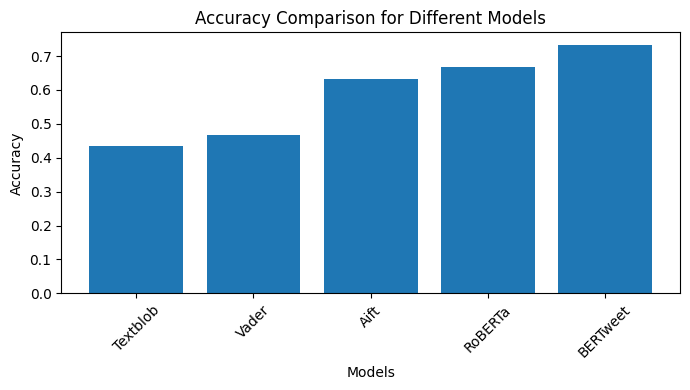

In [26]:
# Plotting Accuracy
plt.figure(figsize=(7, 4))
plt.bar(models, accuracy)
plt.title('Accuracy Comparison for Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

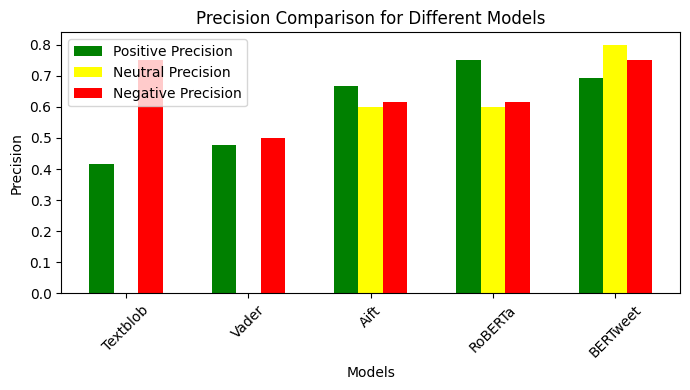

In [27]:
# Plotting Precision
plt.figure(figsize=(7, 4))
bar_width = 0.2
index = range(len(models))
plt.bar(index, precision_positive, width=bar_width, color='green', label='Positive Precision')
plt.bar([i + bar_width for i in index], precision_neutral, width=bar_width, color='yellow', label='Neutral Precision')
plt.bar([i + 2*bar_width for i in index], precision_negative, width=bar_width, color='red', label='Negative Precision')
plt.title('Precision Comparison for Different Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.xticks([i + bar_width for i in index], models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

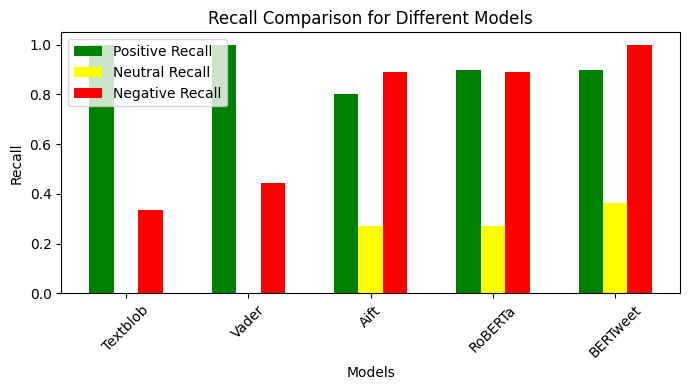

In [28]:
# Plotting Recall
plt.figure(figsize=(7, 4))
bar_width = 0.2
index = range(len(models))
plt.bar(index, recall_positive, width=bar_width, color='green', label='Positive Recall')
plt.bar([i + bar_width for i in index], recall_neutral, width=bar_width, color='yellow', label='Neutral Recall')
plt.bar([i + 2*bar_width for i in index], recall_negative, width=bar_width, color='red', label='Negative Recall')
plt.title('Recall Comparison for Different Models')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.xticks([i + bar_width for i in index], models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()